In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   17G  324G   5% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   21G  345G   6% /opt/bin
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!pip install keras_sequential_ascii
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from keras.models import Sequential
model = Sequential()
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes=10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


print (x_train.shape[1:])#the dimensionalities of the inputs
print(model.summary())

(32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0        

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 17s 335us/step - loss: 0.5587 - acc: 0.8054 - val_loss: 0.5545 - val_acc: 0.8102
Epoch 2/200
50000/50000 [==============================] - 16s 317us/step - loss: 0.5659 - acc: 0.8005 - val_loss: 0.5753 - val_acc: 0.8037
Epoch 3/200
50000/50000 [==============================] - 16s 328us/step - loss: 0.5632 - acc: 0.8019 - val_loss: 0.5392 - val_acc: 0.8141
Epoch 4/200
50000/50000 [==============================] - 16s 324us/step - loss: 0.5666 - acc: 0.8031 - val_loss: 0.5832 - val_acc: 0.8005
Epoch 5/200
50000/50000 [==============================] - 16s 322us/step - loss: 0.5599 - acc: 0.8044 - val_loss: 0.5633 - val_acc: 0.8060
Epoch 6/200
50000/50000 [==============================] - 16s 320us/step - loss: 0.5683 - acc: 0.8023 - val_loss: 0.5743 - val_acc: 0.8069
Epoch 7/200
50000/50000 [==============================] - 16s 329us/step - loss: 0.5576 - acc: 0.8046 - val_l

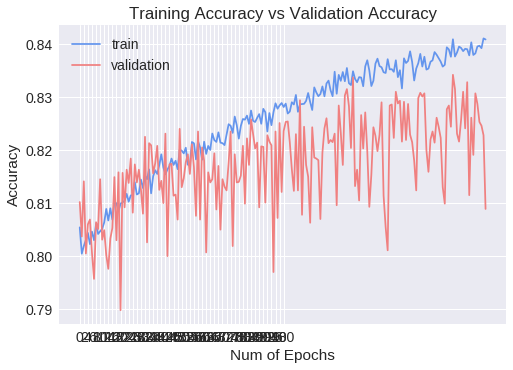

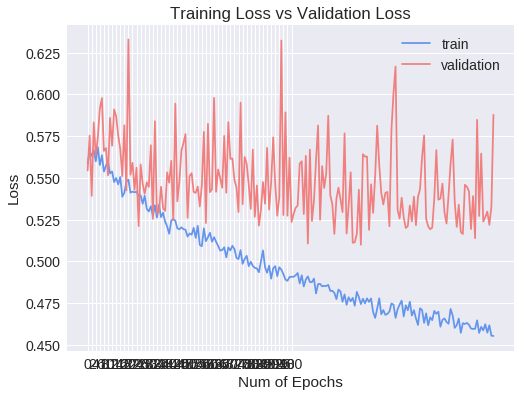

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[854   5  24   9  19   2  15  10  56   6]
 [ 11 892   0   3   2   2  12   2  37  39]
 [ 39   0 714  17  82  32  99   9   8   0]
 [ 20   2  47 539  84 115 160  15  13   5]
 [  6   2  27  12 860   7  67  12   6   1]
 [ 10   0  33  87  68 690  86  23   2   1]
 [  2   0  11  10  15   4 954   1   3   0]
 [  9   0  19  24  82  22  25 814   2   3]
 [ 21   4   5   6  12   0  10   3 931   8]
 [ 24  48   4  12   5   1  21  11  33 841]]


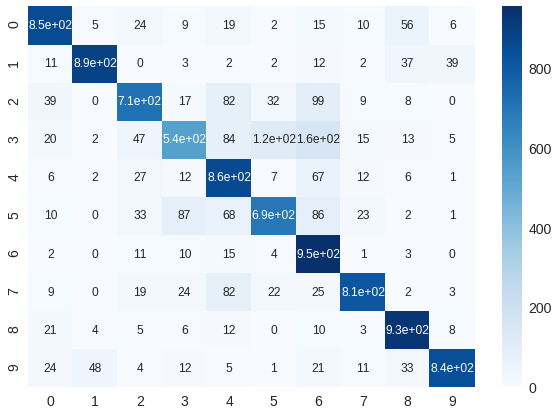

In [0]:
opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size=128
epochs=200

import datetime

# from keras.callbacks import TensorBoard
# tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)




starttime = datetime.datetime.now()

model2 = model.fit(x_train, y_train, batch_size=batch_size, 
                   epochs=epochs, verbose=1, validation_data=(x_test, y_test))

endtime = datetime.datetime.now()
print (endtime - starttime)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


plt.figure(0)
plt.plot(model2.history['acc'],'cornflowerblue')
plt.plot(model2.history['val_acc'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(model2.history['loss'],'cornflowerblue')
plt.plot(model2.history['val_loss'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()


# Confusion matrix result
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size": 12})# font size
plt.show()